In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as spio
import getpass
import os


C:/Users/Sjoerd Gn/Documents/Fieldwork/fieldwork-2019-adcp-adv/data/Sontek\1. Monday morning
20051002095139.mat 1
20051002095859.mat 0
20051002100742.mat 1
20051002101138.mat 0
C:/Users/Sjoerd Gn/Documents/Fieldwork/fieldwork-2019-adcp-adv/data/Sontek\2. Monday afternoon
20051002153808.mat 1
20051002154435.mat 0
20051002155011.mat 1
20051002160639.mat 0
20051002164153.mat 1
C:/Users/Sjoerd Gn/Documents/Fieldwork/fieldwork-2019-adcp-adv/data/Sontek\3. Tuesday morning
20051003091920.mat 1
20051003092617.mat 0
20051003093603.mat 1
20051003094029.mat 0
20051003094530.mat 1
20051003094929.mat 0
C:/Users/Sjoerd Gn/Documents/Fieldwork/fieldwork-2019-adcp-adv/data/Sontek\4. Tuesday afternoon
20051003144213.mat 1
20051003144711.mat 0
20051003145020.mat 1
20051003145441.mat 0
C:/Users/Sjoerd Gn/Documents/Fieldwork/fieldwork-2019-adcp-adv/data/Sontek\6. Wednesday afternoon
20051004133525r.mat 1
20051004134026r.mat 0
20051004134427.mat 1
20051004134809r.mat 0
20051004135347r.mat 1
20051004135713r.

C:/Users/Sjoerd Gn/Documents/Fieldwork/fieldwork-2019-adcp-adv/2019_05_13_ADCP/Sontek


In [3]:
## Variables
Blank_zone = 0.11
Vbeam = 6.32 # distance of vertical sample

C:/Users/Sjoerd Gn/Documents/Fieldwork/fieldwork-2019-adcp-adv/data/Sontek\1. Monday morning
20051002095139.mat 1
Transducerdepth:   Monday morning 20051002095139.mat 0.07


NameError: name 'day' is not defined

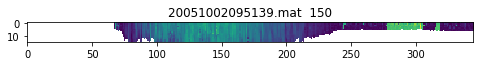

In [14]:
# Was function smartpulsehd on?
smartpulsehd = np.array([1, 1, 0, 0, 0, 1])

# Number of days in total
numdays = 6

# Name of the computer
myhost = getpass.getuser()

# Base folder
folder = 'C:/Users/username/Documents/Fieldwork/fieldwork-2019-adcp-adv/data/Sontek'.replace('username', myhost)# basefolder

# Four different qs per time period
allqs = [np.zeros(numdays) for i in range(4)]

# loop over all roots
for root, dirs, files in os.walk(folder, topdown=False):
    
    
    print(root)
    j = 0
    
    tot_xs = {}
    len_xs = 1000
    
    tot_rightq = np.zeros(6)
    tot_leftq = np.zeros_like(tot_rightq)
    tot_topq = np.zeros_like(tot_rightq)
    tot_middleq = np.zeros_like(tot_rightq)
    
    for file in files:
        if (file[-4:] == '.mat') and (file[-5:] != 'y.mat'):
            direction = int(np.loadtxt(root+'/direction.txt', delimiter = ',')[j])
    
            print(file, direction)
            j+=1

        
            matfile = root+'/'+file
            mat = spio.loadmat(matfile)

            Velocity    = mat['WaterTrack']['Velocity'][()][0][0]       # velocity for each of the 4 beams


            Vprofile = (Velocity[:,0,:]**2+Velocity[:,1,:]**2)**0.5  # average velocity profile
            plt.figure(figsize=(8,12))
            plt.imshow(Vprofile[:15, :])


            RightQ = mat['Summary']['Right_Q'][()][0][0][-1][0]
            LeftQ = mat['Summary']['Left_Q'][()][0][0][-1][0]
            TopQ = mat['Summary']['Top_Q'][()][0][0][-1][0]
            MiddleQ = mat['Summary']['Middle_Q'][()][0][0][-1][0]+mat['Summary']['Bottom_Q'][()][0][0][-1][0]+mat['Summary']['Top_Q'][()][0][0][-1][0]

            tot_rightq[j] = RightQ
            tot_leftq[j] = LeftQ
            tot_topq[j] = TopQ
            tot_middleq[j] = MiddleQ


            TransducerDepth = mat['Setup']['sensorDepth'][()][0][0][0][0]
            print('Transducerdepth: ', root[-15:], file, TransducerDepth)

            Vmean = mat['Summary']['Mean_Vel'][()][:,0][0][0] # = nanmean(Vprofile,1)   # average velocity averaged over the depth   


            Depth = mat['Summary']['Depth'][()][0][0] 
            Cells = (mat['Summary']['Cells'][()])[0][0]#.astype('int')                   # number of cells for each vertical beam

            Cells = np.array([int(Cells[i][0]) for i in range(len(Cells))])



            Discharge   = mat['Summary']['Total_Q'][()][0][0]     # discharge
            Track       = mat['Summary']['Track'][()][0][0]    # track location for each sample in X/Y coordinates
            #print(Track)

             # Wednesday Morning was flipped

            #plt.figure()
            Track_x = np.array([Track[i][0] for i in range(len(Track))])
            Track_y = np.array([Track[i][1] for i in range(len(Track))])
            #plt.plot(Track_x, Track_y)
            #plt.axis('equal')

            Distance = np.array([(Track_x[i]**2+Track_y[i]**2)**0.5 for i in range(len(Track_x))]) #np.sum(abs(Track),1)    #this is probably not be correct and it depends how Track is measured. Please check this!


            if direction==1:  # flip if reverse
                Distance = np.max(Distance)-Distance


            # WE HAVE TO DO EVERYTHING THE OTHER DIRECTION (such as the plot)
            '''
            plt.figure()
            plt.plot(Distance)
            '''

            # Depth_BT    = mat['BottomTrack']['BT_Depth'][()][0][0] # bottom track (BT) depth using 4 beams at 3MHz frequency (smaller depth range, higher resolution). The depth is estimated assuming the river bed does not move and using boat movement information.
            #DepthBeam   = mat['BottomTrack']['BT_Beam_Depth'][()][0][0]                       # total water depth for each beam
            Cellsize = mat['System']['Cell_Size'][()][0][0]
            Cellsize = np.array([round(Cellsize[i][0],4) for i in range(len(Cells))])

            dist_to_vbeam = np.array([abs(Distance[i]-Vbeam) for i in range(len(Distance))])

            Vbeam_cell = np.argmin(dist_to_vbeam)

            y_axis = -Blank_zone-Cellsize[Vbeam_cell]*np.linspace(0.5, Cells[Vbeam_cell]-0.5,Cells[Vbeam_cell])
            x_axis =  Vprofile[0:Cells[Vbeam_cell], Vbeam_cell]

            # AVERAGE SIDES
            # x_axisplus1 = Vprofile[0:Cells[Vbeam_cell+1], Vbeam_cell+1]
            # x_axisminus1 = Vprofile[0:Cells[Vbeam_cell-1], Vbeam_cell-1]
            #minsides = np.min([
            #    len(x_axis), 
            #    len(x_axisplus1), 
            #    len(x_axisminus1)])

            # x_axis = np.array([(x_axis[i]*2+x_axisplus1[i]+x_axisminus1[i])/4 for i in range(minsides)])
            tot_xs[file] = x_axis

            if len(x_axis) < len_xs:
                len_xs = len(x_axis)
                tot_ys = y_axis#[0:minsides]

            '''
            plt.plot(x_axis, y_axis)
            '''

            plt.title(file+'  '+str(Vbeam_cell))


            '''
            plt.figure()
            plt.plot(-Depth, 'b')

            plt.plot(-Cellsize*np.array(Cells)-Blank_zone, 'r')
            plt.plot([0,len(Cells)], [-Blank_zone, -Blank_zone], 'r')
            plt.plot([0,len(Cells)], [0,0], 'b')
            '''
            j += 1 



    x_axis_tot = np.zeros(len_xs)

    for j in range(len_xs):     #depths
        level_tot = np.zeros(numdays)
            
        for i in range(numdays): #files
            level_tot[i] = tot_xs[files[day][i]][j]
                
        x_axis_tot[j] = np.mean(level_tot)
            
        plt.figure(figsize=(12,8))
        plt.plot(x_axis_tot, tot_ys)
        plt.ylim((-.6,0))
        plt.xlim((0, 0.6))

        # Means of the Qs
        mean_rightq = np.mean(tot_rightq)
        mean_leftq = np.mean(tot_leftq)
        mean_topq = np.mean(tot_topq)
        mean_middleq = np.mean(tot_middleq)

        # Save means


        print()
        print('Mean Qs', day)
        print('Mean right Q = ', mean_rightq, 'm^3/s')
        print('Mean left Q = ', mean_leftq, 'm^3/s')
        print('Mean top Q = ', mean_topq, 'm^3/s')
        print('Mean middle Q = ', mean_middleq, 'm^3/s')
        print('Sum all', sum((mean_rightq, mean_rightq, mean_topq, mean_middleq)))
        print('Total Q', Discharge[-1][0])

        allqs[0][k] = mean_rightq
        allqs[1][k] = mean_leftq
        allqs[2][k] = mean_topq
        allqs[3][k] = mean_middleq

        print()
        k += 1


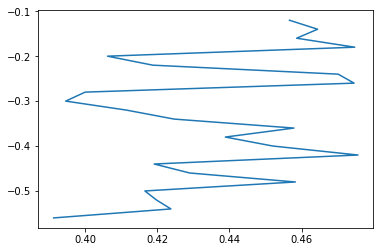

In [6]:
plt.plot(x_axis_tot, tot_ys)

In [38]:
print(allqs)

[array([0.00030963, 0.00107006, 0.00713029, 0.00526318, 0.01742396,
       0.00709698]), array([ 0.        , -0.00028964,  0.01596148,  0.0192531 ,  0.05177486,
        0.0206138 ]), array([0.44116866, 0.36076349, 0.56337136, 0.51911001, 0.62579242,
       0.42078304]), array([1.84120283, 1.70613401, 1.82914927, 1.91460315, 2.2001372 ,
       2.01287431])]


<Figure size 504x504 with 0 Axes>

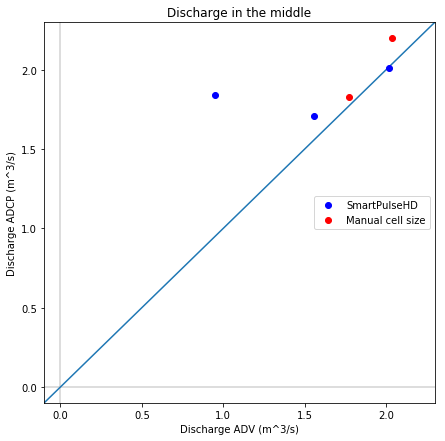

<Figure size 504x504 with 0 Axes>

In [42]:
rightadv = np.array([0.04, 0.05, 0.04, 10000,  0.07, 0.06])
leftadv = np.array([0.03, 0.03, 0.07, 10,  0.06, 0.1])
middleadv = np.array([0.95, 1.56, 1.77, 100,  2.04, 2.02])



plt.figure(figsize=(7,7))
plt.axvline(0, color='lightgray')
plt.axhline(0, color='lightgray')
plt.plot([-3, 3], [-3, 3])
plt.xlim((-.1, 2.3))
plt.ylim((-.1, 2.3))

plt.plot(middleadv[smartpulsehd==1], allqs[3][smartpulsehd==1], 'bo', label = 'SmartPulseHD')
plt.plot(middleadv[smartpulsehd==0], allqs[3][smartpulsehd==0], 'ro', label = 'Manual cell size')
plt.legend()
plt.xlabel('Discharge ADV (m^3/s)')
plt.ylabel('Discharge ADCP (m^3/s)')
plt.title('Discharge in the middle')
plt.savefig('figure1.png')

plt.figure(figsize=(7,7))


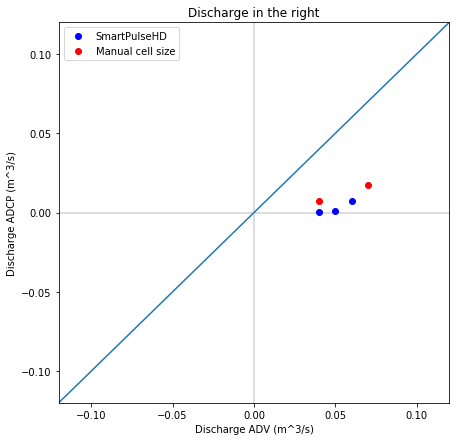

In [43]:
plt.figure(figsize=(7,7))
plt.axvline(0, color='lightgray')
plt.axhline(0, color='lightgray')
plt.plot([-3, 3], [-3, 3])

plt.xlim((-0.12, 0.12))
plt.ylim((-0.12, 0.12))

plt.plot(rightadv[smartpulsehd==1], allqs[0][smartpulsehd==1], 'bo', label = 'SmartPulseHD')
plt.plot(rightadv[smartpulsehd==0], allqs[0][smartpulsehd==0], 'ro', label = 'Manual cell size')
plt.legend()
plt.xlabel('Discharge ADV (m^3/s)')
plt.ylabel('Discharge ADCP (m^3/s)')
plt.title('Discharge in the right')
plt.savefig('figure2.png')


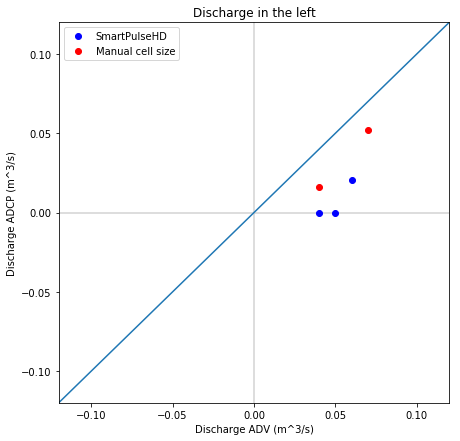

In [44]:
plt.figure(figsize=(7,7))
plt.axvline(0, color='lightgray')
plt.axhline(0, color='lightgray')
plt.plot([-3, 3], [-3, 3])
plt.xlim((-0.12, 0.12))
plt.ylim((-0.12, 0.12))

plt.plot(rightadv[smartpulsehd==1], allqs[1][smartpulsehd==1], 'bo', label = 'SmartPulseHD')
plt.plot(rightadv[smartpulsehd==0], allqs[1][smartpulsehd==0], 'ro', label = 'Manual cell size')
plt.legend()
plt.xlabel('Discharge ADV (m^3/s)')
plt.ylabel('Discharge ADCP (m^3/s)')
plt.title('Discharge in the left')
plt.savefig('figure3.png')